In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/jupyter/map-ephys


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pipeline import tracking, foraging_analysis, lab, experiment
from pipeline.ingest import tracking as tracking_ingest
foraging_sessions = (foraging_analysis.SessionTaskProtocol & 'session_task_protocol in (100, 110, 120)').proj()


[2023-03-28 17:08:33,860][INFO]: Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306
[2023-03-28 17:08:33,913][INFO]: Connected map-superuser@datajoint.mesoscale-activity-map.org:3306


Ingested foraging trackings

In [6]:
trial, video_file = tracking_ingest.TrackingIngestForaging.TrackingFile().fetch('trial', 'video_trial_num')

In [7]:
trial[trial != video_file]

array([213, 214, 215, ..., 429, 430, 431])

In [4]:
session_key = {'subject_id': 482353, 'session': 45}

In [5]:
tracking_ingest.TrackingIngestForaging & session_key

subject_id institution 6 digit animal ID,session session number,tracking_device device type/function
482353,45,Camera 0
482353,45,Camera 1


In [8]:
tracking_devices = (tracking.TrackingDevice & (tracking_ingest.TrackingIngestForaging & session_key)).fetch(as_dict=True)

In [9]:
trk_device = tracking_devices[0]

In [10]:
trk_device_name = trk_device['tracking_device'].replace(' ', '') + '_' + trk_device['tracking_position']

In [16]:
tracking.Tracking().tracking_features

[autoreload of pipeline.tracking failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/opt/conda/lib/python3.7/site-packages/IPython/extension

{'NoseTracking': pipeline.tracking.Tracking.NoseTracking,
 'TongueTracking': pipeline.tracking.Tracking.TongueTracking,
 'JawTracking': pipeline.tracking.Tracking.JawTracking,
 'LeftPawTracking': pipeline.tracking.Tracking.LeftPawTracking,
 'RightPawTracking': pipeline.tracking.Tracking.RightPawTracking,
 'LickPortTracking': pipeline.tracking.Tracking.LickPortTracking,
 'WhiskerTracking': pipeline.tracking.Tracking.WhiskerTracking,
 'nose': pipeline.tracking.Tracking.NoseTracking,
 'tongue': pipeline.tracking.Tracking.TongueTracking,
 'tongue_side': pipeline.tracking.Tracking.TongueSideTracking,
 'jaw': pipeline.tracking.Tracking.JawTracking,
 'left_paw': pipeline.tracking.Tracking.LeftPawTracking,
 'right_paw': pipeline.tracking.Tracking.RightPawTracking,
 'whisker': pipeline.tracking.Tracking.WhiskerTracking,
 'pupil_side': pipeline.tracking.Tracking.PupilSideTracking}

In [11]:
foraging_video = (tracking.Tracking & foraging_sessions) * lab.WaterRestriction.proj(h2o='water_restriction_number') * experiment.Session.proj('session_date')
foraging_video

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,"tracking_samples number of events (possibly frame number, relative to the start of the trial)",h2o WR number,session_date
473360,49,1,Camera 0,2510,HH08,2021-08-12
473360,49,1,Camera 1,2510,HH08,2021-08-12
473360,49,1,Camera 2,829,HH08,2021-08-12
473360,49,2,Camera 0,1867,HH08,2021-08-12
473360,49,2,Camera 1,1867,HH08,2021-08-12
473360,49,2,Camera 2,616,HH08,2021-08-12
473360,49,3,Camera 0,3532,HH08,2021-08-12
473360,49,3,Camera 1,3532,HH08,2021-08-12
473360,49,3,Camera 2,1166,HH08,2021-08-12
473360,49,4,Camera 0,1980,HH08,2021-08-12


In [ ]:
foraging_sessions & tracking.Tracking

In [12]:
key = {'subject_id': 494691, 'session': 17}

In [13]:
tracking.Tracking.Frame & key & {'tracking_device': 'Camera 1'}

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,frame_time Global session-wise time (in sec)
494691,17,1,Camera 1,=BLOB=
494691,17,2,Camera 1,=BLOB=
494691,17,3,Camera 1,=BLOB=
494691,17,4,Camera 1,=BLOB=
494691,17,5,Camera 1,=BLOB=
494691,17,6,Camera 1,=BLOB=
494691,17,7,Camera 1,=BLOB=
494691,17,8,Camera 1,=BLOB=
494691,17,9,Camera 1,=BLOB=
494691,17,10,Camera 1,=BLOB=


In [16]:
tracking.Tracking.TongueTracking & key

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelihood
482353,45,1,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,2,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,3,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,4,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,5,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,6,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,7,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,8,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,9,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,10,Camera 1,=BLOB=,=BLOB=,=BLOB=


In [20]:
ingest_history = tracking_ingest.TrackingIngestForaging.TrackingFile & key
ingest_history

subject_id institution 6 digit animal ID,session session number,tracking_device device type/function,trial trial number (1-based indexing),video_trial_num cache the ni-to-video trial mapping,tracking_file tracking file subpath
482353,45,Camera 1,1,1,HH13/HH13_S10_20211117/bottom_face_1-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,2,2,HH13/HH13_S10_20211117/bottom_face_2-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,3,3,HH13/HH13_S10_20211117/bottom_face_3-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,4,4,HH13/HH13_S10_20211117/bottom_face_4-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,5,5,HH13/HH13_S10_20211117/bottom_face_5-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,6,6,HH13/HH13_S10_20211117/bottom_face_6-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,7,7,HH13/HH13_S10_20211117/bottom_face_7-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,8,8,HH13/HH13_S10_20211117/bottom_face_8-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,9,9,HH13/HH13_S10_20211117/bottom_face_9-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,10,10,HH13/HH13_S10_20211117/bottom_face_10-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv


In [28]:
look_up = pd.DataFrame(ingest_history.fetch())

In [3]:
key = {'subject_id': 482353, 'session': 42}

In [6]:
(tracking.Tracking * tracking.Tracking.TongueTracking) & key

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,"tracking_samples number of events (possibly frame number, relative to the start of the trial)",tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelihood
482353,42,1,Camera 1,2234,=BLOB=,=BLOB=,=BLOB=
482353,42,2,Camera 1,1377,=BLOB=,=BLOB=,=BLOB=
482353,42,3,Camera 1,1938,=BLOB=,=BLOB=,=BLOB=
482353,42,4,Camera 1,2284,=BLOB=,=BLOB=,=BLOB=
482353,42,5,Camera 1,1940,=BLOB=,=BLOB=,=BLOB=
482353,42,6,Camera 1,1502,=BLOB=,=BLOB=,=BLOB=
482353,42,7,Camera 1,2228,=BLOB=,=BLOB=,=BLOB=
482353,42,8,Camera 1,1749,=BLOB=,=BLOB=,=BLOB=
482353,42,9,Camera 1,1350,=BLOB=,=BLOB=,=BLOB=
482353,42,10,Camera 1,1461,=BLOB=,=BLOB=,=BLOB=


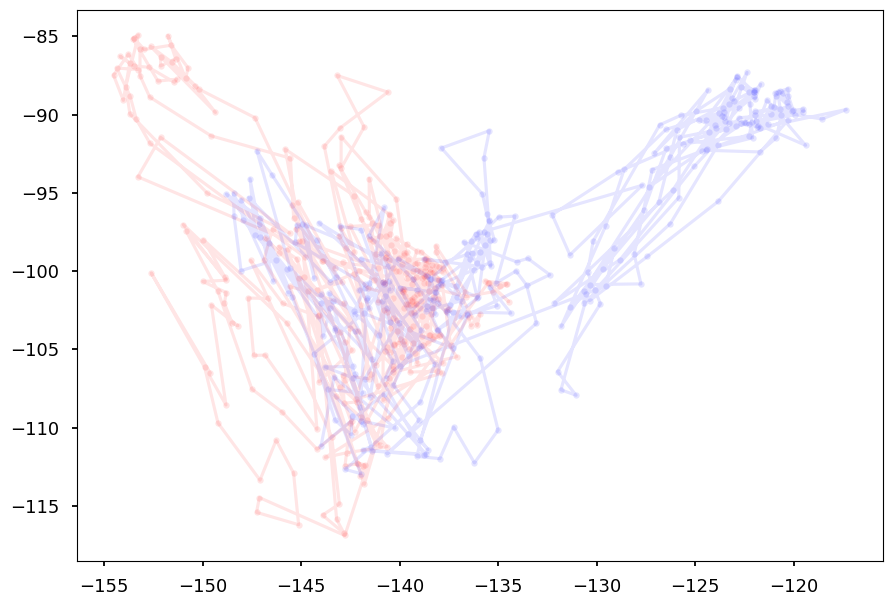

In [4]:
# np.random.seed(42)
for side, col in [['left', 'r'], ['right', 'b']]:
    this_trials = experiment.WaterPortChoice & key & {'water_port': side}
    xs, ys, likelihood = (tracking.Tracking.TongueTracking & key & this_trials).fetch('tongue_x', 'tongue_y', 'tongue_likelihood')
    random_trials = np.random.choice(len(xs), 1)
    
    for x, y, l in zip(xs[random_trials], ys[random_trials], likelihood[random_trials]):
        valid = l >= 0.9
        plt.plot(-x[valid], -y[valid], '.-', c=col, alpha=0.1)

plt.show()

# Pupil size

In [15]:
tracking.Tracking.PupilSideTracking & key

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,"side Up, Down, Left, Right",pupil_side_x,pupil_side_y,pupil_side_likelihood
494691,17,1,Camera 0,Down,=BLOB=,=BLOB=,=BLOB=
494691,17,1,Camera 0,Left,=BLOB=,=BLOB=,=BLOB=
494691,17,1,Camera 0,Right,=BLOB=,=BLOB=,=BLOB=
494691,17,1,Camera 0,Up,=BLOB=,=BLOB=,=BLOB=
494691,17,2,Camera 0,Down,=BLOB=,=BLOB=,=BLOB=
494691,17,2,Camera 0,Left,=BLOB=,=BLOB=,=BLOB=
494691,17,2,Camera 0,Right,=BLOB=,=BLOB=,=BLOB=
494691,17,2,Camera 0,Up,=BLOB=,=BLOB=,=BLOB=
494691,17,3,Camera 0,Down,=BLOB=,=BLOB=,=BLOB=
494691,17,3,Camera 0,Left,=BLOB=,=BLOB=,=BLOB=


In [274]:
trial_key = {**key, 'trial': 10}
sides = ['Down', 'Left', 'Up', 'Right']

df_this_trial = (tracking.Tracking.PupilSideTracking & trial_key).fetch(format='frame').reset_index()

In [285]:
df_this_trial['side'] = pd.Categorical(df_this_trial['side'], categories=sides, ordered=True)
df_this_trial = df_this_trial.sort_values('side')

In [72]:
x

array([[62.3326683 ],
       [56.3965416 ],
       [66.69316101],
       [61.47669601]])

In [73]:
y

array([[62.3326683 ],
       [56.3965416 ],
       [66.69316101],
       [61.47669601]])

In [194]:
xx = np.array([[a[0]] for a in df_this_trial.pupil_side_x])
yy = np.array([[a[0]] for a in df_this_trial.pupil_side_y])
likelihood = np.vstack(df_this_trial.pupil_side_likelihood)

In [202]:
likelihood_ellipse = likelihood.prod(axis=0)
likelihood_ellipse

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
np.mean(X)

0.00645280258701304

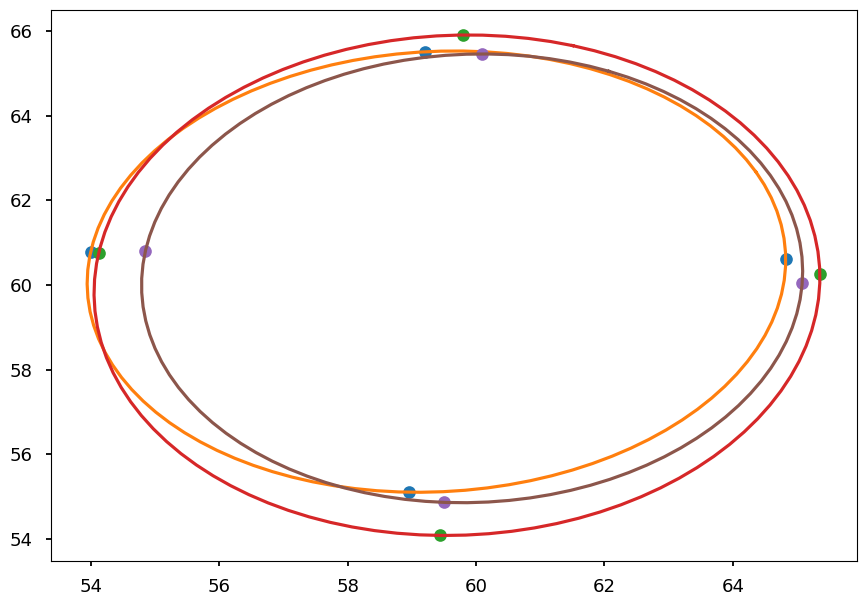

In [286]:
import numpy as np
import matplotlib.pyplot as plt


def PolyArea(x, y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def fit_ellipse(x, y):

    X = x - np.mean(x)
    Y = y - np.mean(y)

    # Formulate and solve the least squares problem ||Ax - b ||^2
    A = np.hstack([X**2, X * Y, Y**2, X, Y])
    b = np.ones_like(X) * 100
    coeffs = np.linalg.lstsq(A, b)[0].squeeze()
    
    return [*coeffs, -100]


def cart_to_pol(coeffs):
    """

    Convert the cartesian conic coefficients, (a, b, c, d, e, f), to the
    ellipse parameters, where F(x, y) = ax^2 + bxy + cy^2 + dx + ey + f = 0.
    The returned parameters are x0, y0, ap, bp, e, phi, where (x0, y0) is the
    ellipse centre; (ap, bp) are the semi-major and semi-minor axes,
    respectively; e is the eccentricity; and phi is the rotation of the semi-
    major axis from the x-axis.

    """

    # We use the formulas from https://mathworld.wolfram.com/Ellipse.html
    # which assumes a cartesian form ax^2 + 2bxy + cy^2 + 2dx + 2fy + g = 0.
    # Therefore, rename and scale b, d and f appropriately.
    a = coeffs[0]
    b = coeffs[1] / 2
    c = coeffs[2]
    d = coeffs[3] / 2
    f = coeffs[4] / 2
    g = coeffs[5]

    den = b**2 - a*c
    if den > 0:
        raise ValueError('coeffs do not represent an ellipse: b^2 - 4ac must'
                         ' be negative!')

    # The location of the ellipse centre.
    x0, y0 = (c*d - b*f) / den, (a*f - b*d) / den

    num = 2 * (a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g)
    fac = np.sqrt((a - c)**2 + 4*b**2)
    # The semi-major and semi-minor axis lengths (these are not sorted).
    ap = np.sqrt(num / den / (fac - a - c))
    bp = np.sqrt(num / den / (-fac - a - c))

    # Sort the semi-major and semi-minor axis lengths but keep track of
    # the original relative magnitudes of width and height.
    width_gt_height = True
    if ap < bp:
        width_gt_height = False
        ap, bp = bp, ap

    # The eccentricity.
    r = (bp/ap)**2
    if r > 1:
        r = 1/r
    e = np.sqrt(1 - r)

    # The angle of anticlockwise rotation of the major-axis from x-axis.
    if b == 0:
        phi = 0 if a < c else np.pi/2
    else:
        phi = np.arctan((2.*b) / (a - c)) / 2
        if a > c:
            phi += np.pi/2
    if not width_gt_height:
        # Ensure that phi is the angle to rotate to the semi-major axis.
        phi += np.pi/2
    phi = phi % np.pi

    return x0, y0, ap, bp, e, phi


def get_ellipse_pts(params, npts=100, tmin=0, tmax=2*np.pi):
    """
    Return npts points on the ellipse described by the params = x0, y0, ap,
    bp, e, phi for values of the parametric variable t between tmin and tmax.

    """

    x0, y0, ap, bp, e, phi = params
    # A grid of the parametric variable, t.
    t = np.linspace(tmin, tmax, npts)
    x = x0 + ap * np.cos(t) * np.cos(phi) - bp * np.sin(t) * np.sin(phi)
    y = y0 + ap * np.cos(t) * np.sin(phi) + bp * np.sin(t) * np.cos(phi)
    return x, y


if __name__ == '__main__':
    
    results = []
    
    for i in range(len(df_this_trial.pupil_side_x.iloc[0])):

        x = np.array([[a[i]] for a in df_this_trial.pupil_side_x])
        y = np.array([[a[i]] for a in df_this_trial.pupil_side_y])
        
        poly_area = PolyArea(x.ravel(), y.ravel())

        x_0 = x.mean()
        y_0 = y.mean()

        coeffs = fit_ellipse(x, y)

        # print('Fitted parameters:')
        # print('a, b, c, d, e, f =', coeffs)
        
        x0, y0, ap, bp, e, phi = cart_to_pol(coeffs)
        
        x0 += x_0
        y0 += y_0
        
        results.append([x0, y0, ap, bp, e, phi, np.pi*ap*bp, poly_area])

        if i%1000 == 0:
            # print(x0, y0, ap, bp, e, phi)
            plt.plot(x, y, 'o')     # given points
            xx, yy = get_ellipse_pts((x0, y0, ap, bp, e, phi))
            plt.plot(xx, yy)
        
    plt.show()
            

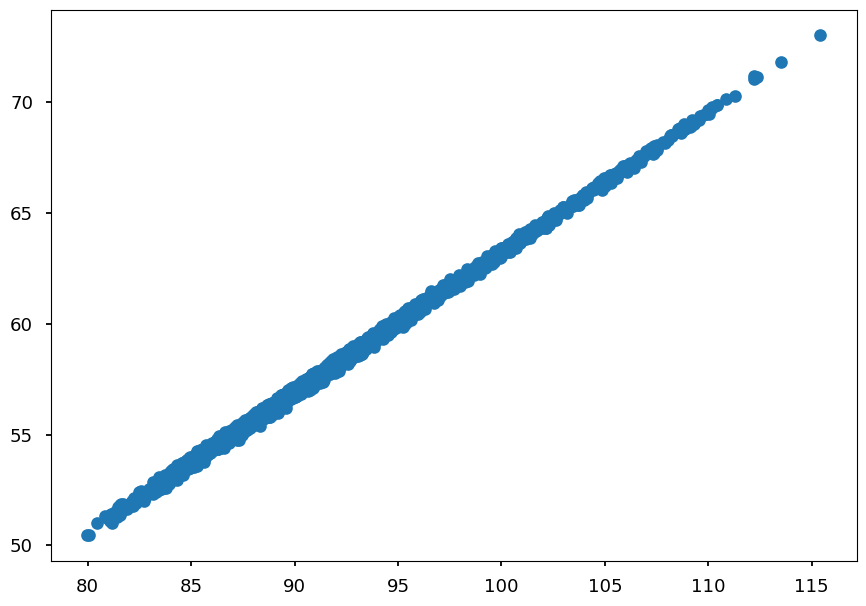

In [287]:
results = np.array(results)
plt.plot(results[:, -2], results[:, -1], 'o')

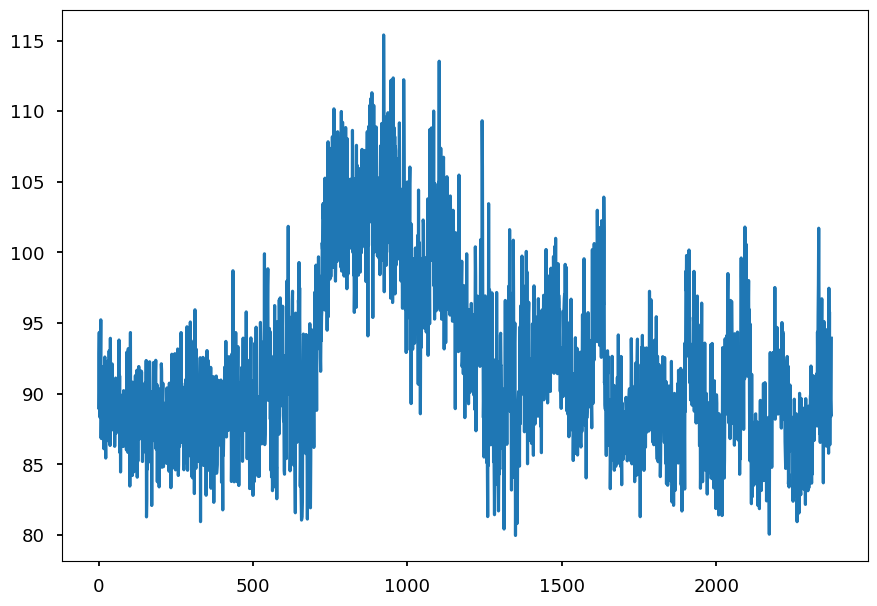

In [288]:
plt.plot(results[:, -2])

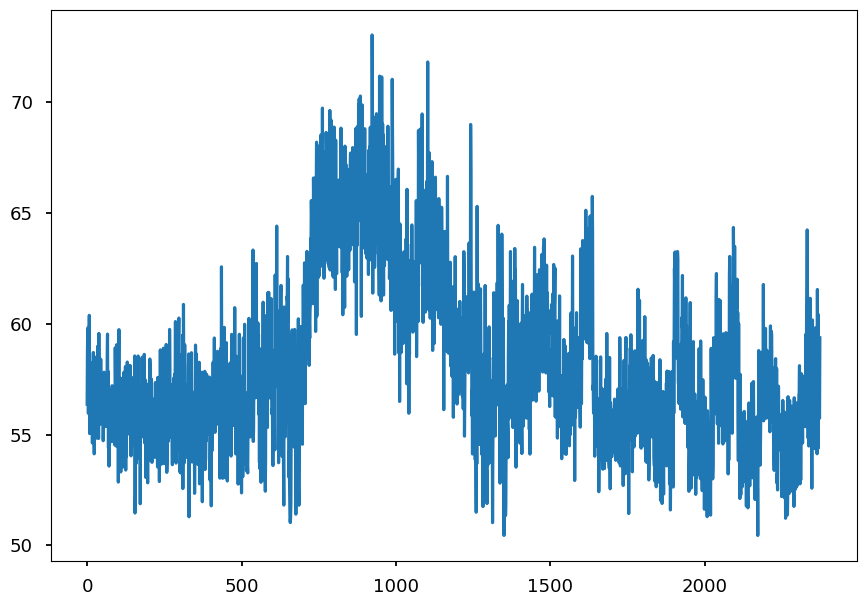

In [289]:
plt.plot(results[:, -1])

In [228]:
x0, y0, a, b, _, phi =  np.array(results).T

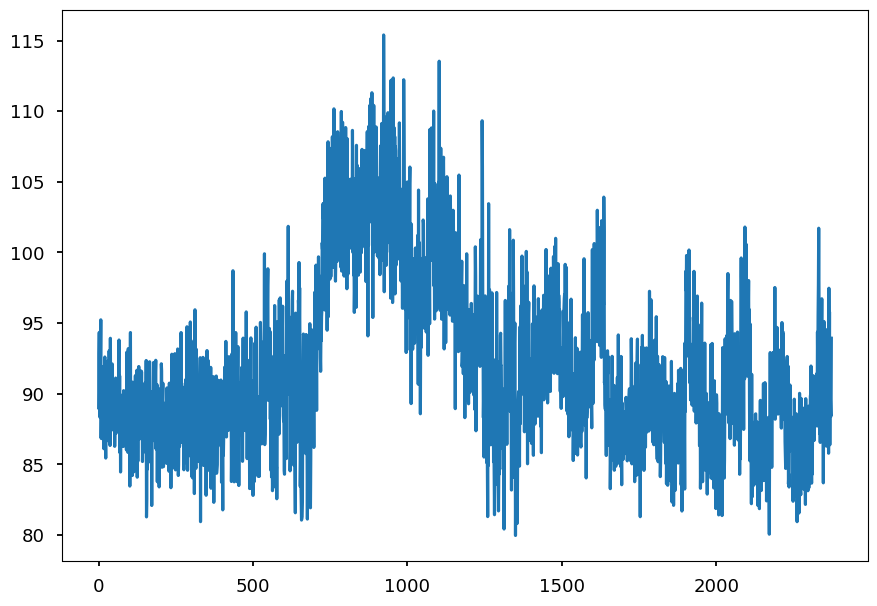

In [229]:
plt.plot(np.pi * a * b)

In [243]:
def fit_ellipse_Kanatani(x, y):
    """

    Fit the coefficients a,b,c,d,e,f, representing an ellipse described by
    the formula F(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0 to the provided
    arrays of data points x=[x1, x2, ..., xn] and y=[y1, y2, ..., yn].

    Based on the algorithm of Halir and Flusser, "Numerically stable direct
    least squares fitting of ellipses'.


    """

    D1 = np.vstack([x**2, x*y, y**2]).T
    D2 = np.vstack([x, y, np.ones(len(x))]).T
    S1 = D1.T @ D1
    S2 = D1.T @ D2
    S3 = D2.T @ D2
    T = -np.linalg.inv(S3) @ S2.T
    M = S1 + S2 @ T
    C = np.array(((0, 0, 2), (0, -1, 0), (2, 0, 0)), dtype=float)
    M = np.linalg.inv(C) @ M
    eigval, eigvec = np.linalg.eig(M)
    con = 4 * eigvec[0]* eigvec[2] - eigvec[1]**2
    ak = eigvec[:, np.nonzero(con > 0)[0]]
    return np.concatenate((ak, T @ ak)).ravel()

In [248]:
xx.ravel()

array([48.35969162, 39.76429749, 59.44258118, 47.40391541])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


polyarea: 7.634165971830953


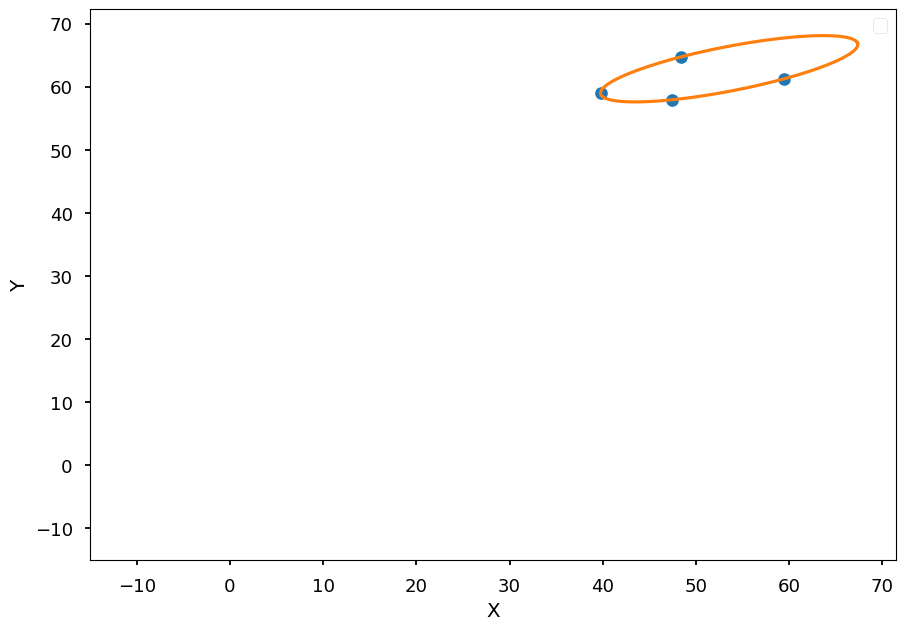

In [258]:
xx = np.array([[48.35969162],
       [39.76429749],
       [59.44258118],
       [47.40391541]])
yy = np.array([[64.73163605],
       [58.95842361],
       [61.26360703],
       [57.94550323]])

x_0 = xx.mean()
y_0 = yy.mean()


def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

print('polyarea:', PolyArea(xx.ravel(), yy.ravel()))

x = fit_ellipse_Kanatani(xx.ravel(), yy.ravel())
x0, y0, ap, bp, e, phi = cart_to_pol(x)

# Plot the least squares ellipse
x_coord = np.linspace(-15,15,300)
y_coord = np.linspace(-15,15,300)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord + x[5]
plt.contour(X_coord, Y_coord, Z_coord, levels=[0], colors=('r'), linewidths=2)


plt.plot(xx, yy, 'o')

xx, yy = get_ellipse_pts((x0, y0, ap, bp, e, phi))
plt.plot(xx, yy)


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [252]:
x0, y0, ap, bp, e, phi

(53.56902939035437,
 62.86731892996336,
 14.367012200424675,
 3.4409936685741234,
 0.970894745969525,
 0.28881094643760824)

In [250]:
x


array([ 1.25575849e-01, -4.82971127e-01,  8.66585020e-01,  1.69091472e+01,
       -8.30874592e+01,  2.14772930e+03])

In [180]:
tracking.Tracking.PupilSideTracking.heading

# 
subject_id           : int                          # institution 6 digit animal ID
session              : smallint                     # session number
trial                : smallint                     # trial number (1-based indexing)
tracking_device      : varchar(20)                  # device type/function
side                 : varchar(36)                  # Up, Down, Left, Right
---
pupil_side_x         : longblob                     # 
pupil_side_y         : longblob                     # 
pupil_side_likelihood : longblob                     # 

In [181]:
experiment.SessionTrial.heading

subject_id           : int                          # institution 6 digit animal ID
session              : smallint                     # session number
trial                : smallint                     # trial number (1-based indexing)
---
trial_uid            : int                          # unique across sessions/animals
start_time           : decimal(9,4)                 # (s) relative to session beginning
stop_time            : decimal(9,4)                 # (s) relative to session beginning